# Logistic Regression from Scratch!

## Data

The dataset used in this notebook is [synthetically](https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae "Click to learn more!") generated.The data consists of a single row of features and a single row of columns. The only feature is **CellGrowthRate** of a certain tumours. We will classify the tumours as *Benign* or *Malignant* 
<br>
Let's first checkout the dataset.

In [630]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [631]:
df1 = pd.read_csv('Features.csv')
df2 = pd.read_csv('Labels.csv')

In [632]:
df1.head()

,CellGrowthRate
0,-1.13
1,1.84
2,1.46
3,1.52
4,2.84


In [633]:
df2.head()

,Labels
0,Benign
1,Malignant
2,Malignant
3,Malignant
4,Malignant


In [634]:
df = pd.concat([df1, df2], axis = 1)
df.head(10)

,CellGrowthRate,Labels
0,-1.1300,Benign
1,1.8400,Malignant
2,1.4600,Malignant
3,1.5200,Malignant
4,2.8400,Malignant
5,1.0800,Malignant
6,-0.7390,Benign
7,1.3700,Malignant
8,0.0667,Malignant
9,2.4500,Malignant


In [635]:
df2[df2['Labels'] == 'Malignant'] = 1
df2[df2['Labels'] == 'Benign'] = 0
df2.head()

,Labels
0,0
1,1
2,1
3,1
4,1


In [636]:
X = df1.values
Y = df2.values
X.shape

(100, 1)

In [637]:
Y.shape


(100, 1)

In [638]:
Y = Y.flatten()
Y.shape

(100,)

## What's the deal? 

Just introduce something called **Activation Function**.
<br>
* What does it *do*?
   + Maps the continuous values predicted by the Linear Regressor into two discrete values.
* What is *Sigmoid*?
   + It's the Activation Function we'll use for our Classifier (for Logistic Regression).
* What happens with the *Cost Function*?
   + For now, we need a different one.

<img src = "comparis.png">

### Let's dig in!

**SIGMOID**
<br>
<img src = "sigmoid.png">

For any input the sigmoid function maps it to 0 or 1 using the following formula 

##  <center>$\sigma (t) = \frac{1}{1 + e^{-t}}$</center>
##  <center>$h(y_p) = \frac{1}{1 + e^{-y_p}}$</center>

In [639]:
def sigmoid(z):
    s = (1 / (1 + np.exp(-z)))
    return s

**Cost Function**
<br>
## <center>$cost(y_p, y) = -ylog(y_p) - (1-y)log(1-y_p)$</center>

**Cost over all samples**

## <center>$J(\theta) = -\frac{1}{n}\sum_{i=1}^{n} [y^ilog(y^i_p) + (1-y^i)log(1-y^i_p)] $</center>

**Gradient**

## <center> $\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{n}\sum_{i=1}^{n} (y^i_p - y^i)x^i $<center>

In [640]:
def loss(y_p, y):
    x = -(y * np.log(y_p) + (1 - y) * np.log(1 - y_p))
    x = x.mean()
    return x

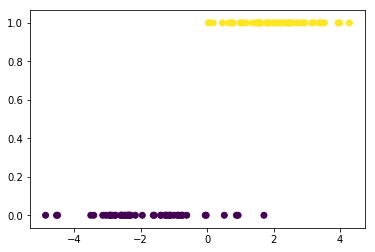

In [641]:
plt.scatter(X, Y, c = Y)

In [645]:
def fit(x, y):
    m = 0
    b = 0
    lr = 0.0002
    n = y.shape[0]
    dm = 0
    db = 0
    for it in range(0, 20):
        yp = m*x + b
        yp = sigmoid(yp)
        cost = loss(yp, y)
        #print(loss(yp, y))
        dm = np.sum(x*(yp-y))
        db = np.sum(yp-y)
        m = m - lr * dm
        b = b - lr * db
    return cost, m, b
        

In [646]:
cost, m, b = fit(X, Y)

In [647]:
pred = sigmoid(X*m+b)
np.sum((pred>0.5).flatten()==Y)/Y.shape[0]
#(train_pred>0.5).flatten()

0.94